## Benchmarking to version downloaded from Putirka's personal website on 27th May, 2021
- Discrepencies likely reflect rounded molar masses



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None
import inspect
from functools import partial

# Plagioclase feldspar-liquid functions

In [3]:
out=pt.import_excel('Python_Liq_Feldspar.xlsx', sheet_name="Plagioclase")
my_input=out['my_input']
myCPXs1=out['Cpxs']
myFspars1=out['Plags']
myLiquids1=out['Liqs']

## comparing to equilibrium tests
- Putirka (2008) say a possible equilibrium test is Kd An-Ab (Ab-An exchange), which is near invariant wrt. pressure, temperature and H2O. 
- Say that value at T>1050 is 0.28+-0.11, and T<1050 is 0.1+-0.05

In [7]:
pt.calculate_plag_liq_eq_tests(liq_comps=myLiquids1, plag_comps=myFspars1, P=10*my_input['P_GPa'], T=1273.15).head()

,Pass An-Ab Eq Test Put2008?,Delta_An,Delta_Ab,Delta_Or,Pred_An_EqE,Pred_Ab_EqF,Pred_Or_EqG,Obs_Kd_Ab_An,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Fe2_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,P,T
0,Low T: Yes,0.056252,0.141146,0.029165,0.360876,0.694802,0.000050,0.510102,57.3,0.09,26.6,0.43,0.0,0.03,8.33,6.11,0.49,0.0,0,0.953660,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,49.1,3.22,14.4,14.8,0.14,3.20,6.72,3.34,1.70,0.0,1.13,0.0,0.0,0.0,0.0,0.0,0,0.549988,0.053436,0.001328,0.138640,0.080652,0.095052,0.036269,0.012146,0.027130,0.005358,0.0,0.478739,0.046513,0.001156,0.120680,0.070204,0.165477,0.063141,0.021146,0.023616,0.009328,0.0,0.120680,0.278194,0.278194,10.0,1273.15
1,Low T: Yes,0.083157,0.227579,0.028164,0.369968,0.746123,0.000168,0.455475,56.5,0.12,26.9,0.47,0.0,0.05,8.95,5.66,0.47,0.0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,49.2,3.89,15.3,13.7,0.12,3.88,6.76,3.44,1.22,0.0,0.83,0.0,0.0,0.0,0.0,0.0,1,0.545500,0.064131,0.001127,0.127030,0.080306,0.099965,0.036975,0.008628,0.032442,0.003896,0.0,0.474569,0.055792,0.000980,0.110512,0.069864,0.173933,0.064334,0.015012,0.028224,0.006778,0.0,0.110512,0.335475,0.335475,10.0,1273.15
2,Low T: Yes,0.051532,0.238397,0.023142,0.366729,0.796700,0.000293,0.500004,57.6,0.11,26.3,0.50,0.0,0.07,8.50,6.27,0.40,0.0,2,0.958653,0.001737,0.006959,0.151576,0.515884,0.202327,0.008493,0.0,0.001377,0.0,1.847006,0.519031,0.000940,0.003768,0.082066,0.279308,0.109543,0.004598,0.0,0.000746,0.0,0.418261,0.558303,0.023435,49.6,3.79,15.8,13.0,0.14,4.26,6.59,3.65,1.04,0.0,0.63,0.0,0.0,0.0,0.0,0.0,2,0.547269,0.070071,0.001308,0.119955,0.077907,0.102731,0.039042,0.007319,0.031455,0.002943,0.0,0.475045,0.060823,0.001136,0.104124,0.067626,0.178348,0.067779,0.012707,0.027304,0.005108,0.0,0.104124,0.368736,0.368736,10.0,1273.15
3,Low T: Yes,0.078766,0.183502,0.049673,0.369873,0.685172,0.000018,0.461028,57.2,0.16,27.0,0.62,0.0,0.06,9.03,5.58,0.84,0.0,3,0.951996,0.001489,0.008630,0.161027,0.529614,0.180061,0.017835,0.0,0.002003,0.0,1.852655,0.513855,0.000804,0.004658,0.086917,0.285868,0.097191,0.009627,0.0,0.001081,0.0,0.448640,0.501670,0.049691,47.1,4.21,12.0,17.8,0.18,3.40,7.28,2.93,2.02,0.0,2.32,0.0,0.0,0.0,0.0,0.0,3,0.521269,0.056096,0.001687,0.164747,0.086327,0.078262,0.031436,0.014260,0.035047,0.010869,0.0,0.459338,0.049431,0.001487,0.145174,0.076070,0.137927,0.055402,0.025132,0.030883,0.019156,0.0,0.145174,0.254001,0.254001,7.0,1273.15
4,Low T: Yes,0.119752,0.278277,0.028227,0.350220,0.779913,0.000166,0.369633,56.7,0.14,27.6,0.69,0.0,0.11,9.46,5.58,0.48,0.0,4,0.943674,0.002729,0.009604,0.168695,0.541383,0.180061,0.010192,0.0,0.001753,0.0,1.858092,0.507873,0.001469,0.005169,0.090790,0.291365,0.096907,0.005485,0.0,0.000943,0.0,0.469971,0.501636,0.028393,48.1,

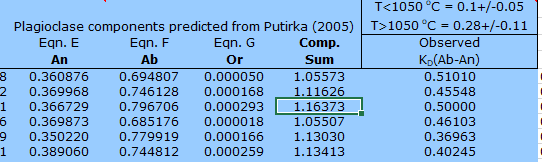

##  Putirka 2005 Equation H Hygrometer

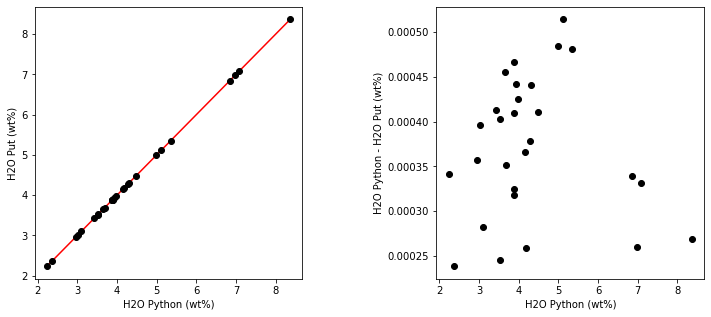

In [10]:
H_Put=my_input['FixedT_P_H2O_Put2005_eqH']
H_py_all=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myFspars1, equationH="H_Put2005_eqH", T=1000+273.15, P=my_input['P_GPa']*10)
H_py=H_py_all['H2O_calc']
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(H_Put), np.max(H_Put)], [np.min(H_Put), np.max(H_Put)], '-r')
ax1.plot(H_py, H_Put, 'ok')
ax1.set_xlabel('H2O Python (wt%)')
ax1.set_ylabel('H2O Put (wt%)')
ax2.plot(H_py, (H_py-H_Put), 'ok')
ax2.set_ylabel('H2O Python - H2O Put (wt%)')
ax2.set_xlabel('H2O Python (wt%)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 2008 Equation 25b Hygrometer

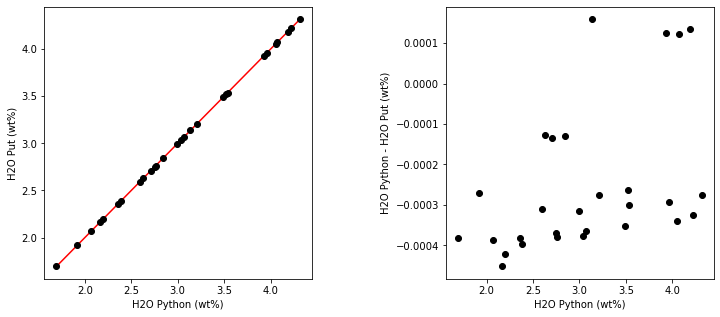

In [12]:
H_Put=my_input['FixedT_P_H2O_Put2008_Eq25b']
H_py_all=pt.calculate_fspar_liq_hygr(liq_comps=myLiquids1, plag_comps=myFspars1, equationH="H_Put2008_eq25b", T=1000+273.15, P=my_input['P_GPa']*10)
H_py=H_py_all['H2O_calc']
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(H_Put), np.max(H_Put)], [np.min(H_Put), np.max(H_Put)], '-r')
ax1.plot(H_py, H_Put, 'ok')
ax1.set_xlabel('H2O Python (wt%)')
ax1.set_ylabel('H2O Put (wt%)')
ax2.plot(H_py, (H_py-H_Put), 'ok')
ax2.set_ylabel('H2O Python - H2O Put (wt%)')
ax2.set_xlabel('H2O Python (wt%)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Equation 25 Putirka (2008) Barometer
-

### This shows the barometer using the molar masses in Keith's spreadsheets

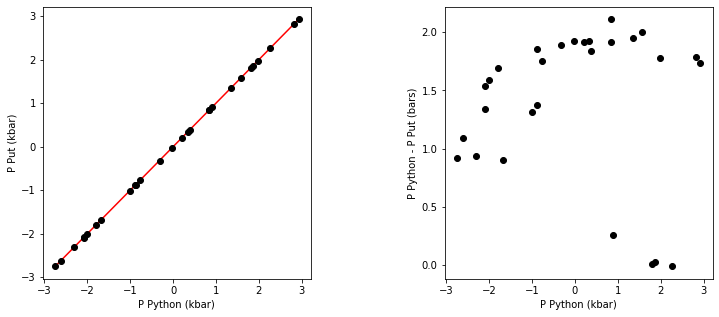

In [13]:
P_Put=my_input['FixedT_P_Put2008_25a']
P_py=pt.calculate_fspar_liq_press(plag_comps=myFspars1, liq_comps=myLiquids1, equationP="P_Put2008_eq25", T=1000+273.15)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

### This shows the barometer updating the molar masses in the spreadsheet

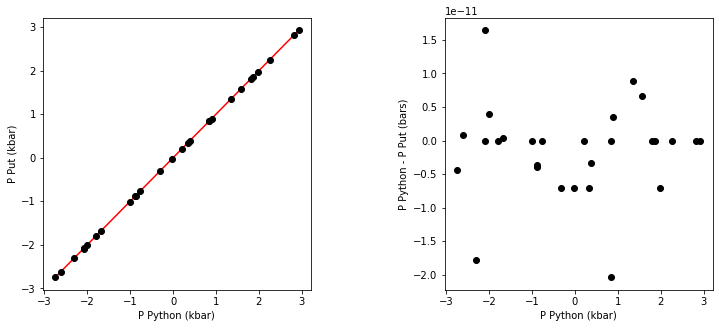

In [14]:
P_Put=my_input['FixedT_P_Put2008_25a_myMM']
P_py=pt.calculate_fspar_liq_press(plag_comps=myFspars1, liq_comps=myLiquids1, equationP="P_Put2008_eq25", T=1000+273.15)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(P_Put), np.max(P_Put)], [np.min(P_Put), np.max(P_Put)], '-r')
ax1.plot(P_py, P_Put, 'ok')
ax1.set_xlabel('P Python (kbar)')
ax1.set_ylabel('P Put (kbar)')
ax2.plot(P_py, 1000*(P_py-P_Put), 'ok')
ax2.set_ylabel('P Python - P Put (bars)')
ax2.set_xlabel('P Python (kbar)')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Plagioclase Thermometers

## Putirka (2008) Equation 26 - Actually uses liquid-only function, as doesnt have a plag comp
- Note, get quite a big discrepency if set P2O5 and Cr2O3 to zero, as in the Liquid thermometry spreadsheet of Putirka. Hence, have if statement in Liq_Temp function

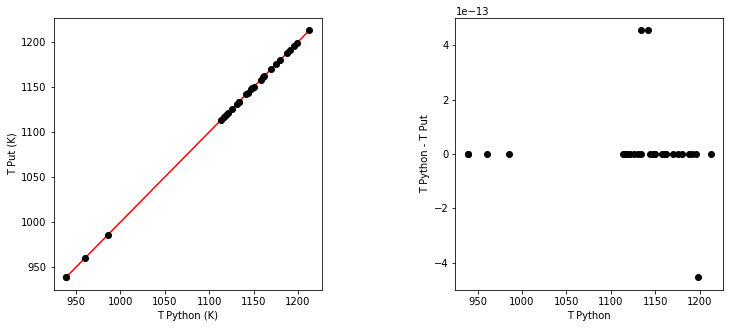

In [16]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['FixedP_T_Put2008_Eq26_sat'] 
T_py=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2008_eq26_plag_sat", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka (2008) equation 24a

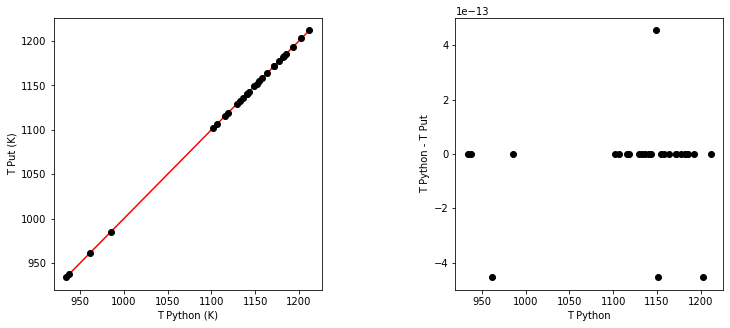

In [17]:
# Discrepencies likely due to rounded molar masses
T_Put=my_input['FixedP_T_Put2008_Eq24a'] 
T_py=pt.calculate_fspar_liq_temp(plag_comps=myFspars1, liq_comps=myLiquids1, equationT="T_Put2008_eq24a", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka2008_eq23

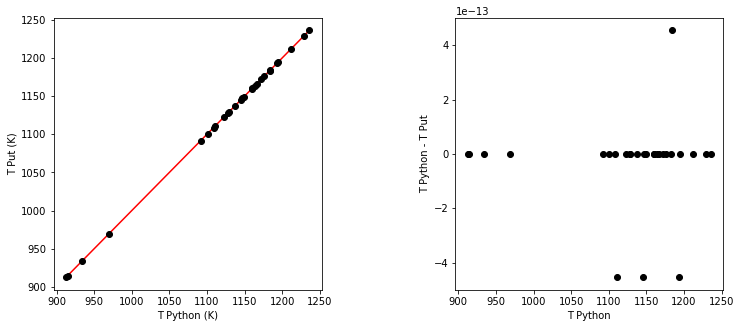

In [18]:
T_Put=my_input['FixedP_T_Put2008_Eq23'] 
T_py=pt.calculate_fspar_liq_temp(plag_comps=myFspars1, liq_comps=myLiquids1, equationT="T_Put2008_eq23", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

## Putirka 2005 equation D plagioclase saturation

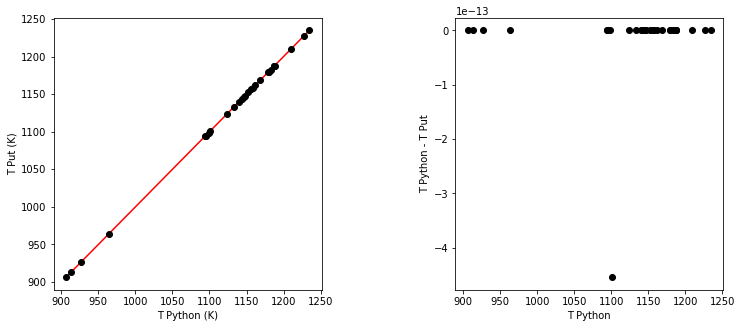

In [20]:
T_Put=my_input['FixedP_T_Put2005_sat'] 
T_py=pt.calculate_liq_only_temp(liq_comps=myLiquids1, equationT="T_Put2005_eqD_plag_sat", P=10*my_input['P_GPa'])-273.15
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
#plotting 1:1 line
ax1.plot([np.min(T_Put), np.max(T_Put)], [np.min(T_Put), np.max(T_Put)], '-r')
ax1.plot(T_py, T_Put, 'ok')
ax1.set_xlabel('T Python (K)')
ax1.set_ylabel('T Put (K)')
ax2.plot(T_py, T_py-T_Put, 'ok')
ax2.set_ylabel('T Python - T Put')
ax2.set_xlabel('T Python')
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)